In [1]:
import numpy as np
import os
from os.path import isfile
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, TimeDistributed, LSTM, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, Flatten, Conv2D, BatchNormalization, Lambda
from keras.layers.advanced_activations import ELU
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from keras import backend
from keras.utils import np_utils
from keras.optimizers import Adam, RMSprop

from keras import regularizers


import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Mount google drive with data

### Connect to Test Set

In [2]:
from keras.models import load_model

weights_path = 'weights.best.h5'
model = load_model(weights_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [8]:
import numpy as np
import pandas as pd

def progress_absolute(npz):
    npzfile = np.load(npz)
    print(npzfile.files)
    X_test = npzfile['arr_0']
    y_test = npzfile['arr_1']
    print(X_test.shape, y_test.shape)



    dict_genres = {'Electronic':0, 'Experimental':1, 'Folk':2, 'Hip-Hop':3, 
                   'Instrumental':4,'International':5, 'Pop' :6, 'Rock': 7  }

    list_genres = ['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 
                   'Instrumental','International', 'Pop', 'Rock'  ]
    from sklearn.metrics import classification_report

    y_true = y_test
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)




    progress = []
    for i in range(len(y_pred)):
        x = np.array(y_pred[:i])
        y = np.bincount(x)
        ii = np.nonzero(y)[0]
        for val,cnt in zip(ii,y[ii]):
            progress.append([i,list_genres[val],cnt/len(x)])


    df = pd.DataFrame(np.array(progress), columns=['time', 'genre', 'ratio'])
    df = df.astype({"time": int, "genre": "category", "ratio":np.float16})
    df.info()

    import seaborn as sns

    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.lineplot(data=df,x='time', y='ratio', hue='genre')



['arr_0', 'arr_1']
(386, 640, 128) (1,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 3 columns):
time     2527 non-null int64
genre    2527 non-null category
ratio    2527 non-null float16
dtypes: category(1), float16(1), int64(1)
memory usage: 27.6 KB


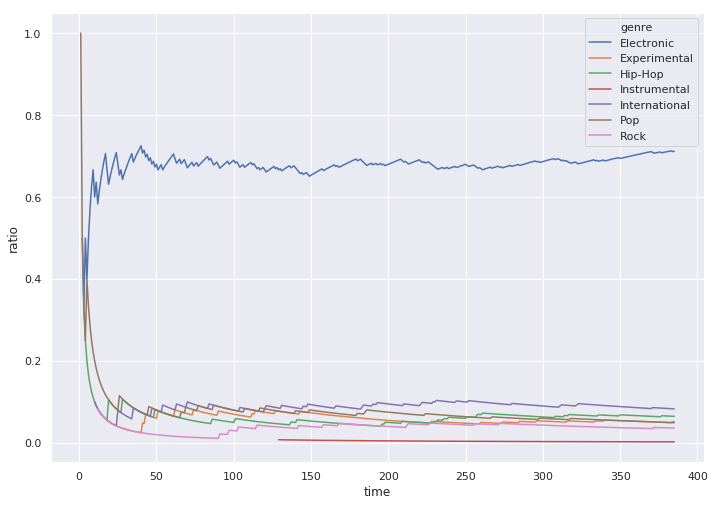

In [9]:
progress_absolute("ragga100.npz")

['arr_0', 'arr_1']
(358, 640, 128) (1,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 3 columns):
time     2073 non-null int64
genre    2073 non-null category
ratio    2073 non-null float16
dtypes: category(1), float16(1), int64(1)
memory usage: 22.5 KB


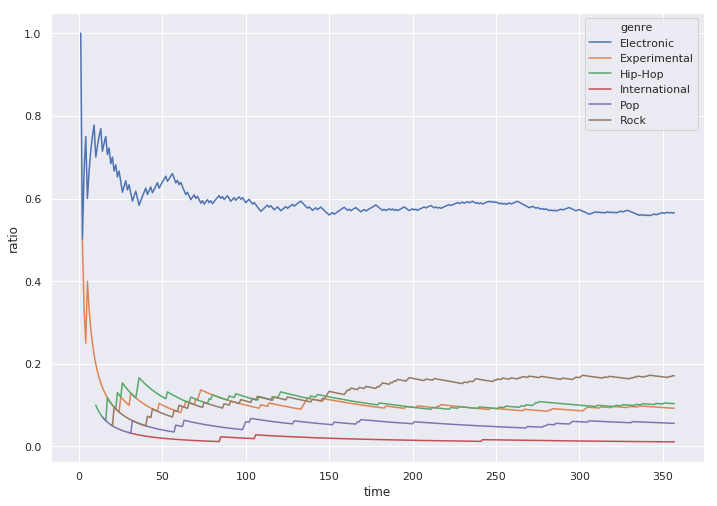

In [18]:
progress_absolute("voodoo_people.npz")

['arr_0', 'arr_1']
(294, 640, 128) (1,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 3 columns):
time     1224 non-null int64
genre    1224 non-null category
ratio    1224 non-null float16
dtypes: category(1), float16(1), int64(1)
memory usage: 13.4 KB


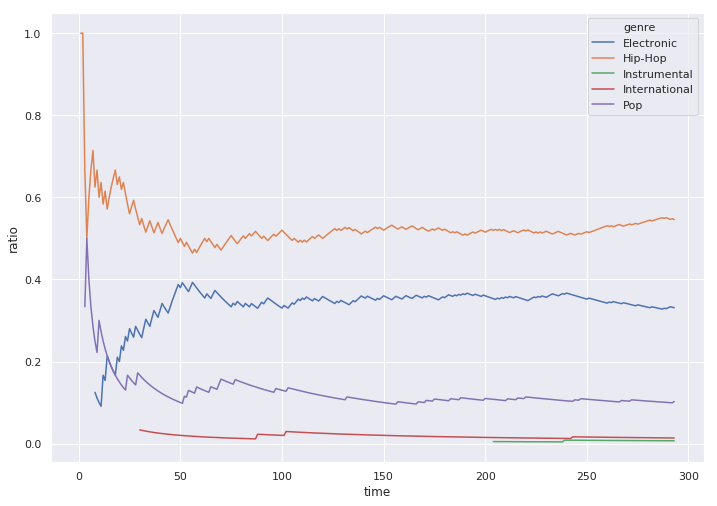

In [10]:
progress_absolute("ageispolis.npz")

['arr_0', 'arr_1']
(733, 640, 128) (1,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 3 columns):
time     3822 non-null int64
genre    3822 non-null category
ratio    3822 non-null float16
dtypes: category(1), float16(1), int64(1)
memory usage: 41.5 KB


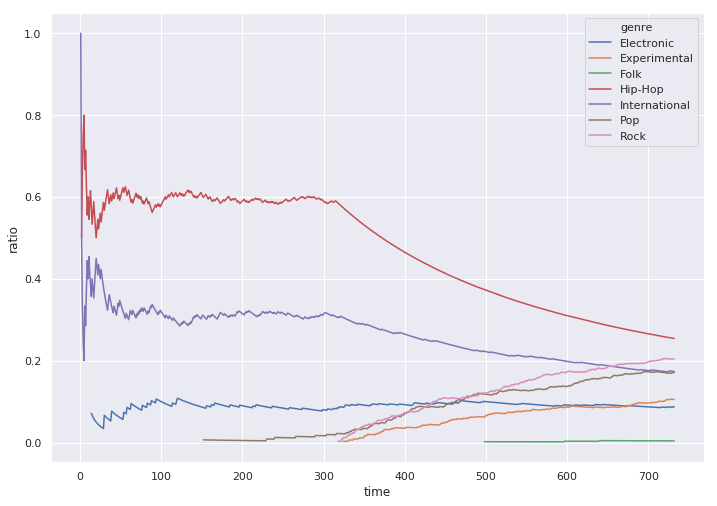

In [11]:
progress_absolute('police.npz')

In [15]:
import numpy as np
import pandas as pd

def progress_sliding(npz, size):
    npzfile = np.load(npz)
    print(npzfile.files)
    X_test = npzfile['arr_0']
    y_test = npzfile['arr_1']
    print(X_test.shape, y_test.shape)



    dict_genres = {'Electronic':0, 'Experimental':1, 'Folk':2, 'Hip-Hop':3, 
                   'Instrumental':4,'International':5, 'Pop' :6, 'Rock': 7  }

    list_genres = ['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 
                   'Instrumental','International', 'Pop', 'Rock'  ]
    from sklearn.metrics import classification_report

    y_true = y_test
    y_pred = model.predict(X_test)
    y_pred = np.argmax(y_pred, axis=1)




    progress = []
    for i in range(len(y_pred-size)):
        x = np.array(y_pred[0+i:size+i])
        y = np.bincount(x)
        ii = np.nonzero(y)[0]
        for val,cnt in zip(ii,y[ii]):
            progress.append([i,list_genres[val],cnt/size])


    df = pd.DataFrame(np.array(progress), columns=['time', 'genre', 'ratio'])
    df = df.astype({"time": int, "genre": "category", "ratio":np.float16})
    df.info()

    import seaborn as sns

    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.lineplot(data=df,x='time', y='ratio', hue='genre')



['arr_0', 'arr_1']
(386, 640, 128) (1,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 3 columns):
time     1937 non-null int64
genre    1937 non-null category
ratio    1937 non-null float16
dtypes: category(1), float16(1), int64(1)
memory usage: 21.3 KB


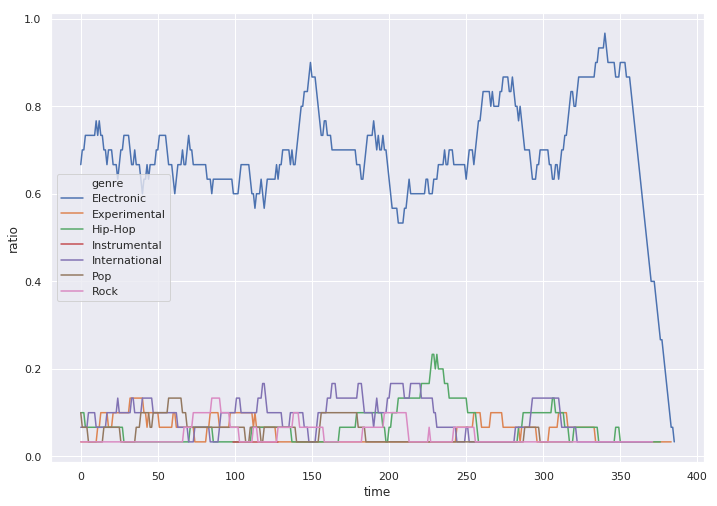

In [19]:
progress_sliding('ragga100.npz', 30)

['arr_0', 'arr_1']
(358, 640, 128) (1,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 3 columns):
time     1770 non-null int64
genre    1770 non-null category
ratio    1770 non-null float16
dtypes: category(1), float16(1), int64(1)
memory usage: 19.3 KB


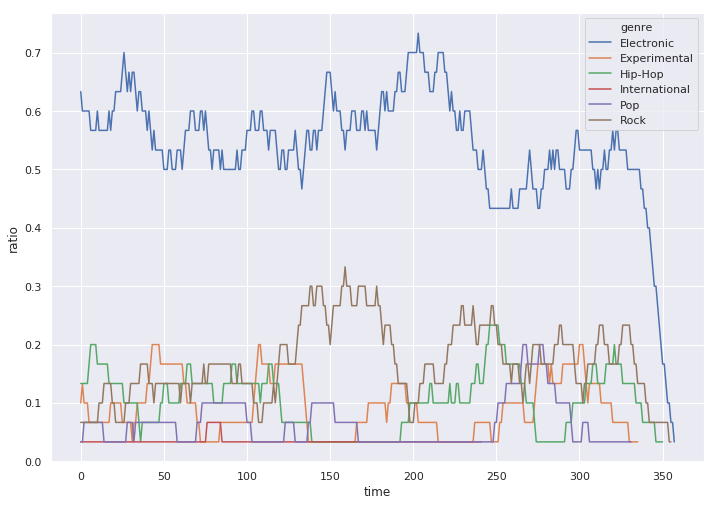

In [20]:
progress_sliding('voodoo_people.npz', 30)

['arr_0', 'arr_1']
(294, 640, 128) (1,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 3 columns):
time     1043 non-null int64
genre    1043 non-null category
ratio    1043 non-null float16
dtypes: category(1), float16(1), int64(1)
memory usage: 11.5 KB


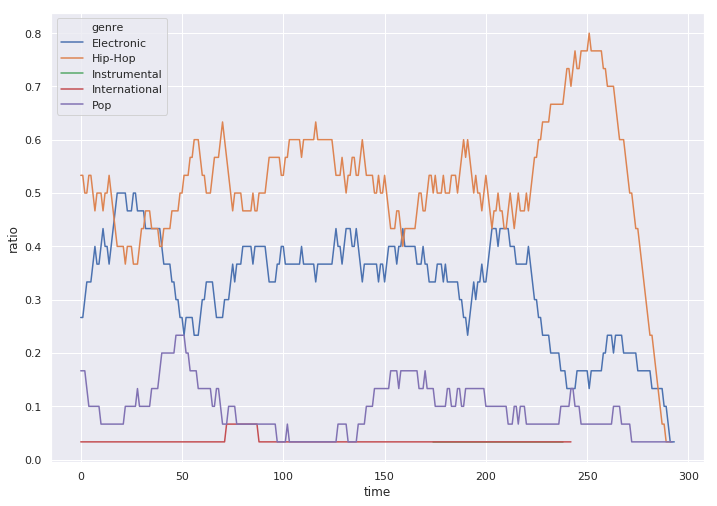

In [21]:
progress_sliding('ageispolis.npz', 30)

['arr_0', 'arr_1']
(733, 640, 128) (1,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3224 entries, 0 to 3223
Data columns (total 3 columns):
time     3224 non-null int64
genre    3224 non-null category
ratio    3224 non-null float16
dtypes: category(1), float16(1), int64(1)
memory usage: 35.1 KB


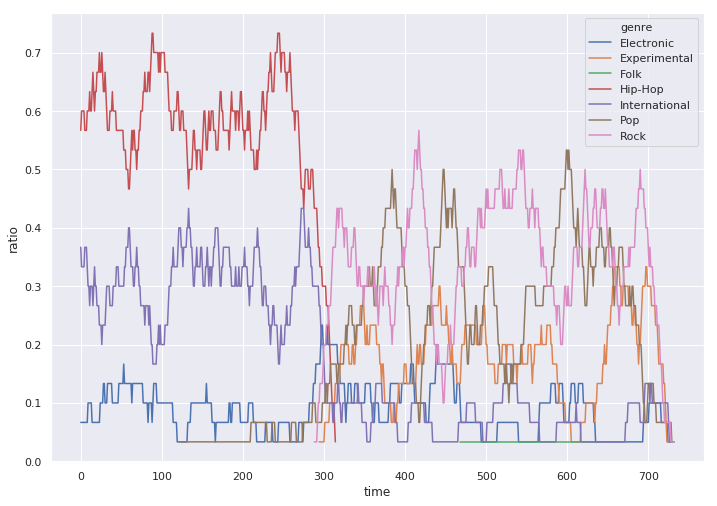

In [16]:
progress_sliding('police.npz', 30)

In [17]:
df


time          genre     ratio
0        1  International  1.000000
1        2        Hip-Hop  0.500000
2        2  International  0.500000
3        3        Hip-Hop  0.666504
4        3  International  0.333252
5        4        Hip-Hop  0.750000
6        4  International  0.250000
7        5        Hip-Hop  0.799805
8        5  International  0.199951
9        6        Hip-Hop  0.666504
10       6  International  0.333252
11       7        Hip-Hop  0.714355
12       7  International  0.285645
13       8        Hip-Hop  0.625000
14       8  International  0.375000
15       9        Hip-Hop  0.555664
16       9  International  0.444336
17      10        Hip-Hop  0.600098
18      10  International  0.399902
19      11        Hip-Hop  0.545410
20      11  International  0.454590
21      12        Hip-Hop  0.583496
22      12  International  0.416748
23      13        Hip-Hop  0.615234
24      13  International  0.384521
25      14     Electronic  0.071411
26      14        Hip-Hop  0.571289
27      14  International  0.357178
28      15     Electronic  0.066650
29      15        Hip-Hop  0.533203
...    ...            ...       ...
3792   728            Pop  0.168945
3793   728           Rock  0.204712
3794   729     Electronic  0.086426
3795   729   Experimental  0.105652
3796   729           Folk  0.004116
3797   729        Hip-Hop  0.255127
3798   729  International  0.174194
3799   729            Pop  0.170044
3800   729           Rock  0.204346
3801   730     Electronic  0.086304
3802   730   Experimental  0.105469
3803   730           Folk  0.004108
3804   730        Hip-Hop  0.254883
3805   730  International  0.173950
3806   730            Pop  0.171265
3807   730           Rock  0.204102
3808   731     Electronic  0.087524
3809   731   Experimental  0.105347
3810   731           Folk  0.004105
3811   731        Hip-Hop  0.254395
3812   731  International  0.173706
3813   731            Pop  0.171021
3814   731           Rock  0.203857
3815   732     Electronic  0.087402
3816   732   Experimental  0.105164
3817   732           Folk  0.004097
3818   732        Hip-Hop  0.254150
3819   732  International  0.173462
3820   732            Pop  0.170776
3821   732           Rock  0.204956

[3822 rows x 3 columns]